# DATA ANALYSIS

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [158]:
# Load the data
survey_data = pd.read_csv("Survey data_Inflight Satisfaction Score.csv")
inventory_data = pd.read_csv("Inflight Service_Inventory data.csv")
preorder_data = pd.read_csv("Inflight Service_Pre order data.csv")
comments_data = pd.read_csv("Survey data _Customer comments.csv")


In [159]:
# Filter data for September
survey_data['scheduled_departure_date'] = pd.to_datetime(survey_data['scheduled_departure_date'])
# Convert 'scheduled_departure_dtl' to datetime for inventory_data
inventory_data['scheduled_departure_dtl'] = pd.to_datetime(inventory_data['scheduled_departure_dtl'])

# Convert 'scheduled_departure_dtl' to datetime for preorder_data
preorder_data['scheduled_departure_dtl'] = pd.to_datetime(preorder_data['scheduled_departure_dtl'])

# Convert 'scheduled_departure_date' to datetime for comments_data
comments_data['scheduled_departure_date'] = pd.to_datetime(comments_data['scheduled_departure_date'])
september_data = survey_data[survey_data['scheduled_departure_date'].dt.month == 9]
september_inventory = inventory_data[inventory_data['scheduled_departure_dtl'].dt.month == 9]
september_preorder = preorder_data[preorder_data['scheduled_departure_dtl'].dt.month == 9]
september_comments = comments_data[comments_data['scheduled_departure_date'].dt.month == 9]


In [161]:
import pandas as pd

# Load your data into the september_data DataFrame

# Clean the 'score' column
september_data['score'] = september_data['score'].str.replace(r'\D+', '', regex=True)  # Remove non-numeric characters

# Convert the 'score' column to numeric
september_data['score'] = pd.to_numeric(september_data['score'], errors='coerce')  # Convert to numeric, NaN for non-convertible values

# Group and calculate the mean
grouped_survey_data = september_data.groupby(['cabin_code_desc', 'haul_type', 'hub_spoke'])['score'].mean()

# Print the grouped data
print("Grouped Survey Data for September:")
print(grouped_survey_data)


Grouped Survey Data for September:
cabin_code_desc      haul_type  hub_spoke      
Business             Long       hub departure      2.674419
                                spoke departure    2.642979
                     Medium     hub departure      2.944557
                                spoke departure    2.838002
                     Short      hub departure      2.854118
                                spoke departure    3.079186
Economy              Long       hub departure      2.505635
                                spoke departure    2.871539
                     Medium     hub departure      3.018490
                                spoke departure    2.943381
                     Short      hub departure      2.838090
                                spoke departure    2.888069
United Premium Plus  Long       hub departure      2.653580
                                spoke departure    2.840951
                     Medium     hub departure      3.276423
                 

In [162]:
# Text analysis using CountVectorizer for September comments
vectorizer = CountVectorizer()
september_comments = comments_data[comments_data['scheduled_departure_date'].dt.month == 9]
comment_counts = vectorizer.fit_transform(september_comments['verbatim_text'])
common_words = vectorizer.get_feature_names_out()
print(common_words)

['00' '000' '00am' ... '焼きそばが期待していたものとは少し違って残念' '食物可怕' '飲料ok']


In [163]:
# Display column names
print("Columns in september_inventory:", september_inventory.columns)
print("Columns in september_preorder:", september_preorder.columns)

# Merge September inventory data with pre-order data
common_columns = ['flight_number', 'scheduled_departure_dtl']
merged_data = pd.merge(september_inventory, september_preorder, on=common_columns)

# Print the merged data
print("Merged Data:")
print(merged_data)


Columns in september_inventory: Index(['flight_number', 'departure_station_code', 'arrival_station_code',
       'scheduled_departure_dtl', 'entree_product_id', 'entree_description',
       'entree_code', 'planned_entree_count', 'consumed_entree_count'],
      dtype='object')
Columns in september_preorder: Index(['flight_number', 'departure_station_code', 'arrival_station_code',
       'record_locator', 'carrier_code', 'scheduled_departure_dtl',
       'cabin_code', 'meal_group', 'meal_category', 'meal_short_description',
       'meal_description', 'is_entree', 'pre_order_qty'],
      dtype='object')
Merged Data:
        flight_number departure_station_code_x arrival_station_code_x  \
0                2666                      ORX                    IAX   
1                2666                      ORX                    IAX   
2                2666                      ORX                    IAX   
3                2666                      ORX                    IAX   
4             

In [164]:

# Analyze trends in planned vs consumed entrees
entree_trends = merged_data.groupby('entree_description')[['planned_entree_count', 'consumed_entree_count']].sum()
print(entree_trends)



                                       planned_entree_count  \
entree_description                                            
ASIAN VEGETARIAN MEAL                                  3957   
Beef burger                                             105   
Belgium waffle                                       366307   
Brioche cheeseburger                                 159948   
Butternut squash ravioli                               2733   
...                                                     ...   
Tomato, basil and mozzarella sandwich                   255   
Vegetarian chili and polenta cake                     38661   
Vegetarian entree                                     18884   
Zatar chicken                                        814962   
Zatar chicken entree                                    104   

                                       consumed_entree_count  
entree_description                                            
ASIAN VEGETARIAN MEAL                                 

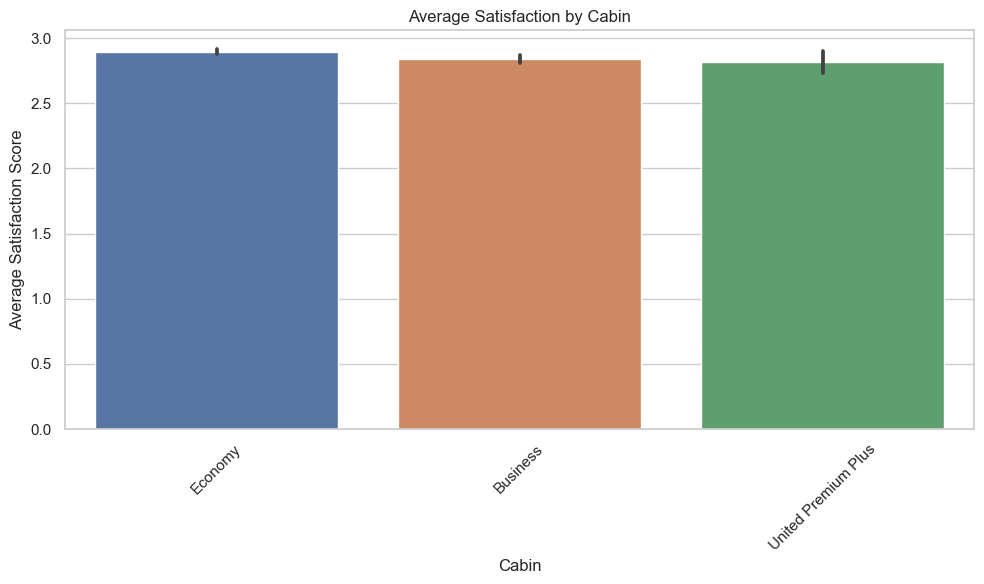

In [165]:
# Create a bar chart for average satisfaction by cabin
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='cabin_code_desc', y='score', data=september_data)
plt.xlabel('Cabin')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction by Cabin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23088\2447826761.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


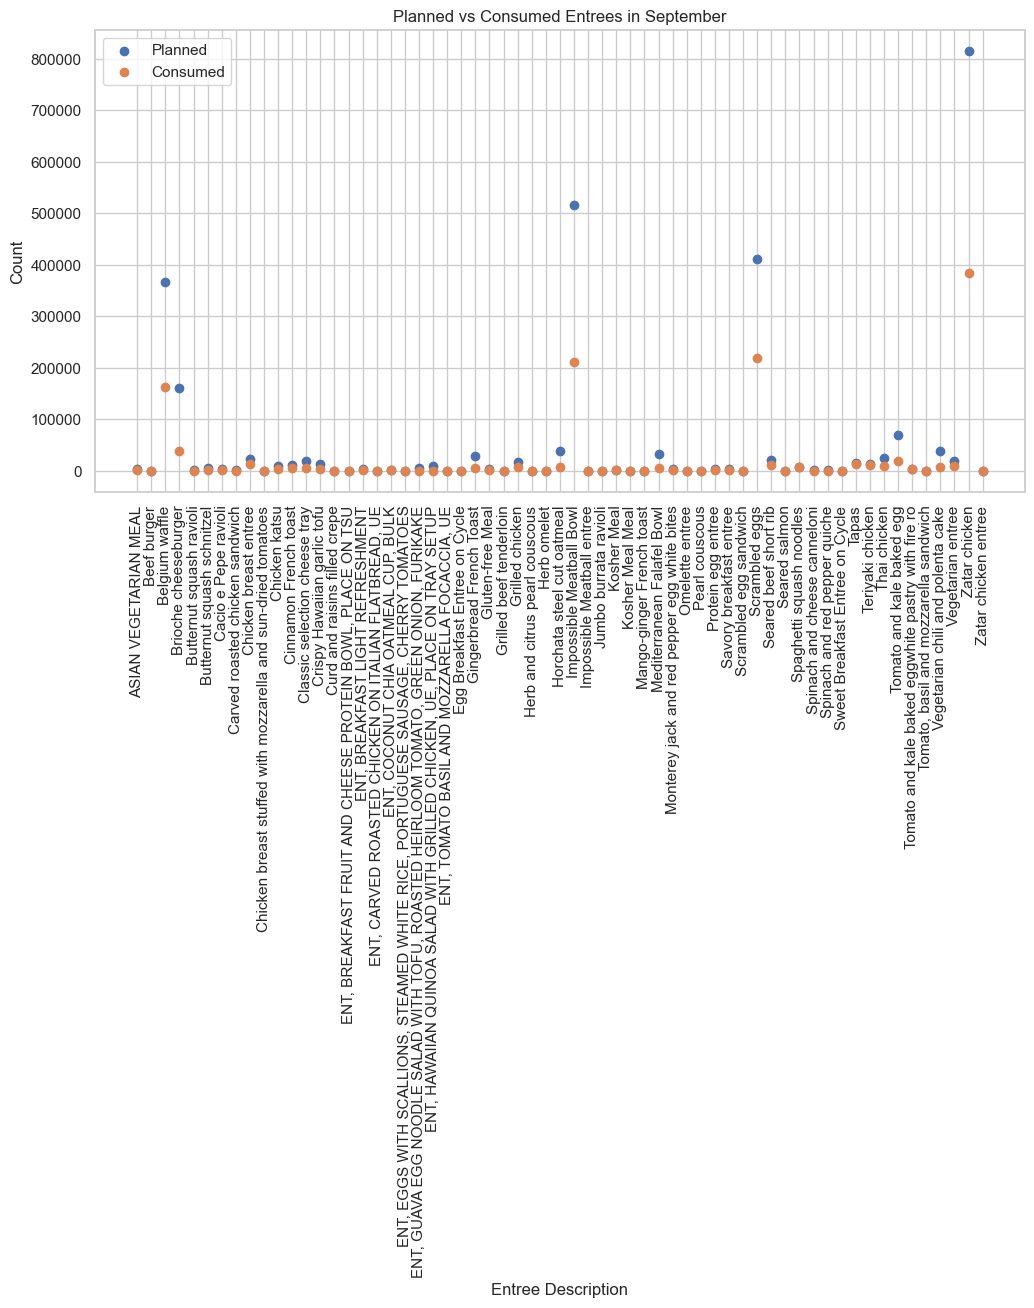

In [166]:
import numpy as np

# Create an array of x-coordinates for scatter plot (adjust the values based on your preference)
x_coordinates = np.arange(len(entree_trends))

# Create a scatter plot for planned vs consumed entrees
plt.figure(figsize=(12, 6))
plt.scatter(x_coordinates, entree_trends['planned_entree_count'], label='Planned')
plt.scatter(x_coordinates, entree_trends['consumed_entree_count'], label='Consumed')
plt.xticks(x_coordinates, entree_trends.index, rotation=90)
plt.xlabel('Entree Description')
plt.ylabel('Count')
plt.title('Planned vs Consumed Entrees in September')
plt.legend()
plt.tight_layout()
plt.show()


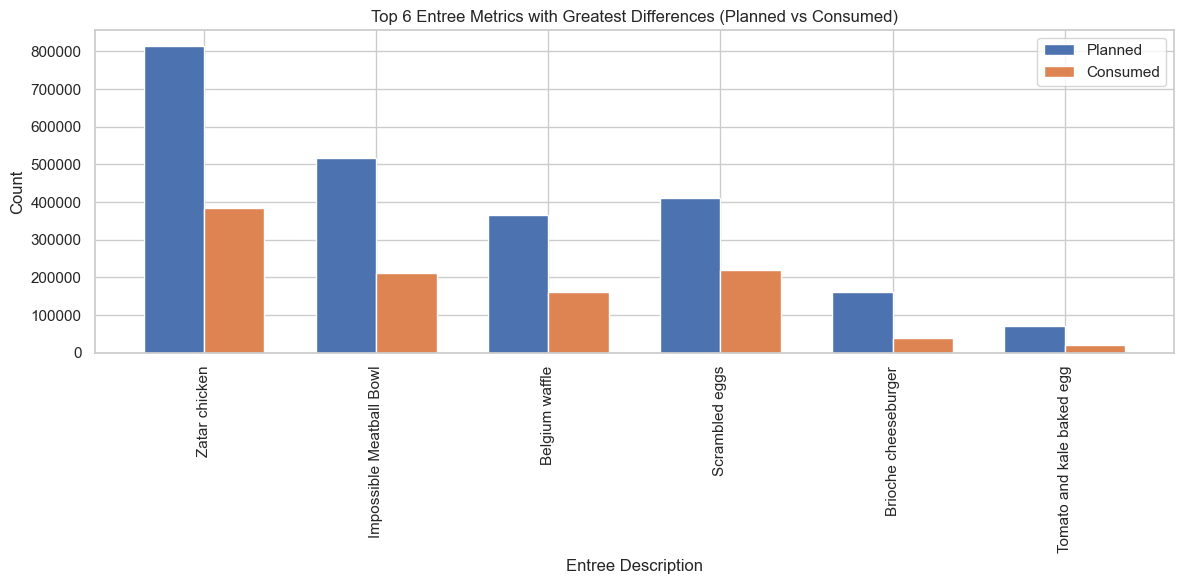

In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the difference between planned and consumed entrees
entree_trends['difference'] = entree_trends['planned_entree_count'] - entree_trends['consumed_entree_count']

# Select the top 6 metrics with the greatest differences
top_entrees = entree_trends.nlargest(6, 'difference')

# Create an array of x-coordinates for the grouped bar plot
x_coordinates = np.arange(len(top_entrees))

# Define the bar width based on your preference
bar_width = 0.35

# Create a grouped bar plot for the top 7 metrics
plt.figure(figsize=(12, 6))
plt.bar(x_coordinates, top_entrees['planned_entree_count'], width=bar_width, label='Planned')
plt.bar(x_coordinates + bar_width, top_entrees['consumed_entree_count'], width=bar_width, label='Consumed')

plt.xticks(x_coordinates + bar_width/2, top_entrees.index, rotation=90)
plt.xlabel('Entree Description')
plt.ylabel('Count')
plt.title('Top 6 Entree Metrics with Greatest Differences (Planned vs Consumed)')
plt.legend()
plt.tight_layout()
plt.show()


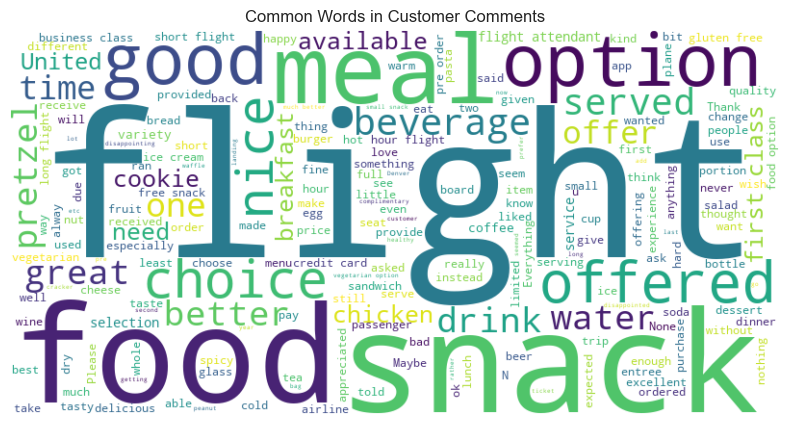

In [168]:
# Create a word cloud from common words in customer comments
comment_text = ' '.join(september_comments['verbatim_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Customer Comments')
plt.show()

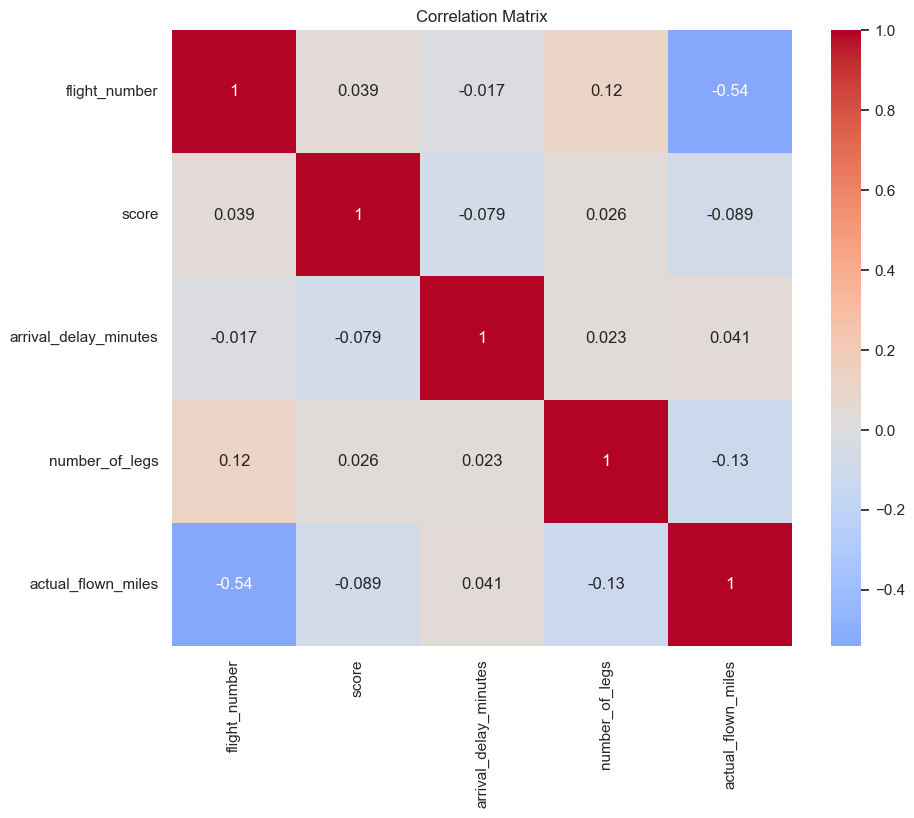

In [169]:
# Explore correlation between satisfaction score and other attributes
# Filter numeric columns for correlation analysis
numeric_columns = september_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = september_data[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


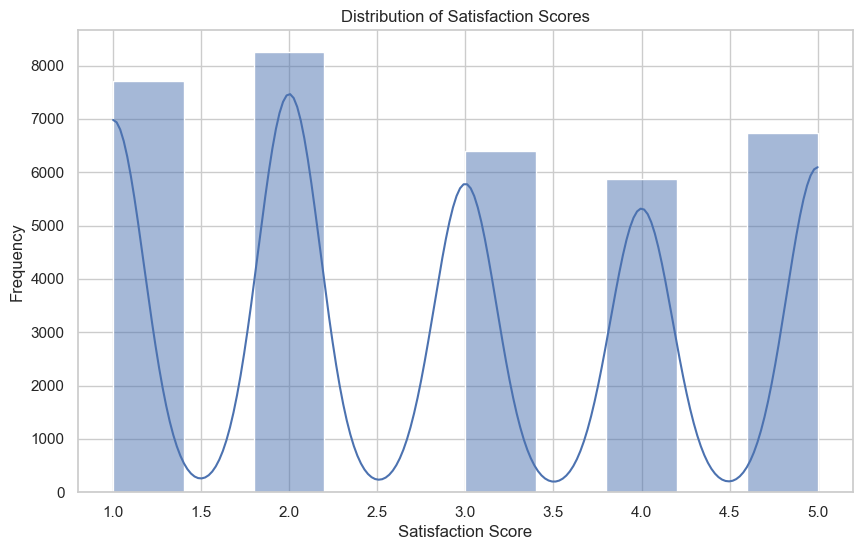

In [170]:
# Analyze the distribution of satisfaction scores
plt.figure(figsize=(10, 6))
sns.histplot(data=september_data, x='score', bins=10, kde=True)
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Scores')
plt.show()

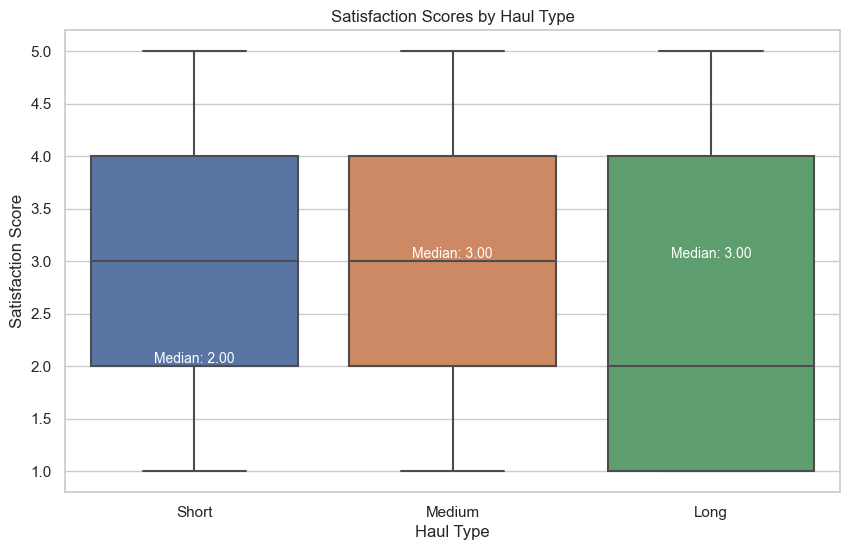

In [196]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='haul_type', y='score', data=september_data)
plt.xlabel('Haul Type')
plt.ylabel('Satisfaction Score')
plt.title('Satisfaction Scores by Haul Type')

# Calculate and display median scores for each haul type
medians = september_data.groupby('haul_type')['score'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'Median: {median:.2f}', ha='center', va='bottom', color='white', fontsize=10)

plt.show()


In [172]:
# Further deep dive: Analyze sentiment in customer comments
common_columns1 = ['flight_number']

merged_data1 = pd.merge(september_data, september_comments, on=common_columns1)
positive_comments = merged_data1[merged_data1['score'] >= 4]
negative_comments = merged_data1[merged_data1['score'] <= 2]

print("\nPositive Customer Comments Sample:")
print(positive_comments['verbatim_text'].sample(5).values)
print("\nNegative Customer Comments Sample:")
print(negative_comments['verbatim_text'].sample(5).values)



Positive Customer Comments Sample:
['Variety of teas.'
 'I preordered and the flight attendants did not seem to know that I had.'
 'The vegetarian and vegan menus do not contain adequate protein sources. These menus should be served with appropriate plant or dairy-based protein sources such as but not limited to: tofu and other soy derivatives, pulses, beans;. for vegetarians: all of the above plus portions of cheese, yogurt, cottage cheese, eggs, etc.'
 'Meal and sandwich. Very tasty and filling.' 'No.']

Negative Customer Comments Sample:
['Not at this time.' 'no.'
 'I enjoyed the food. the chicken entree was really too salty.'
 'Food MUCH BETTER then befor.'
 'The flight attendant serving beverages was delightful. Helpful, pleasant and hospitable.']


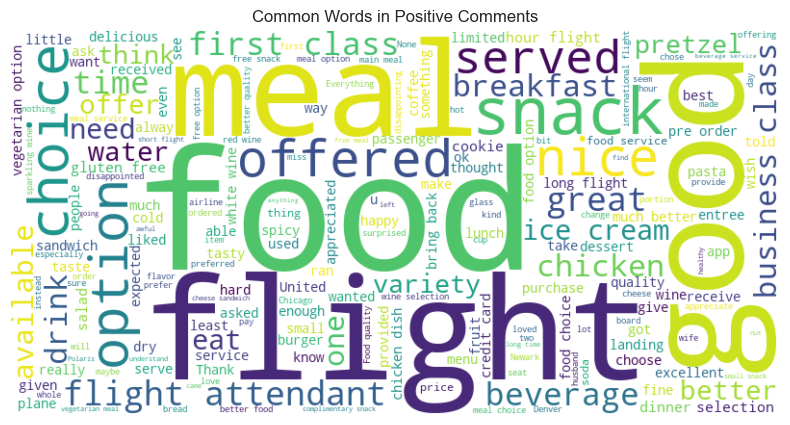

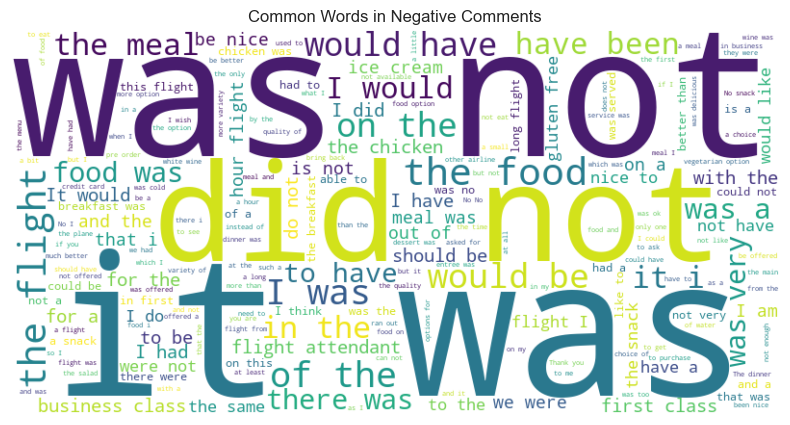

In [173]:
from wordcloud import WordCloud, STOPWORDS

# Further deep dive: Analyze sentiment in customer comments
common_columns1 = ['flight_number']

# Merge September data with comments
merged_data1 = pd.merge(september_data, september_comments, on=common_columns1)

# Filter positive and negative comments
positive_comments = merged_data1[merged_data1['score'] >= 4]
negative_comments = merged_data1[merged_data1['score'] <= 3]

# Define custom stopwords (words to be excluded from word clouds)
custom_stopwords = set(['good', 'excellent', 'great', 'wonderful', 'fantastic', 'awesome', 'amazing', 'superb', 'outstanding'])

# Create word clouds for positive and negative comments
def create_word_cloud(comments, title, stopwords=None):
    comment_text = ' '.join(comments['verbatim_text'])
    
    if stopwords is not None:
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(comment_text)
    else:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Create word clouds for common words in positive and negative comments
create_word_cloud(positive_comments, 'Common Words in Positive Comments')
create_word_cloud(negative_comments, 'Common Words in Negative Comments', custom_stopwords)


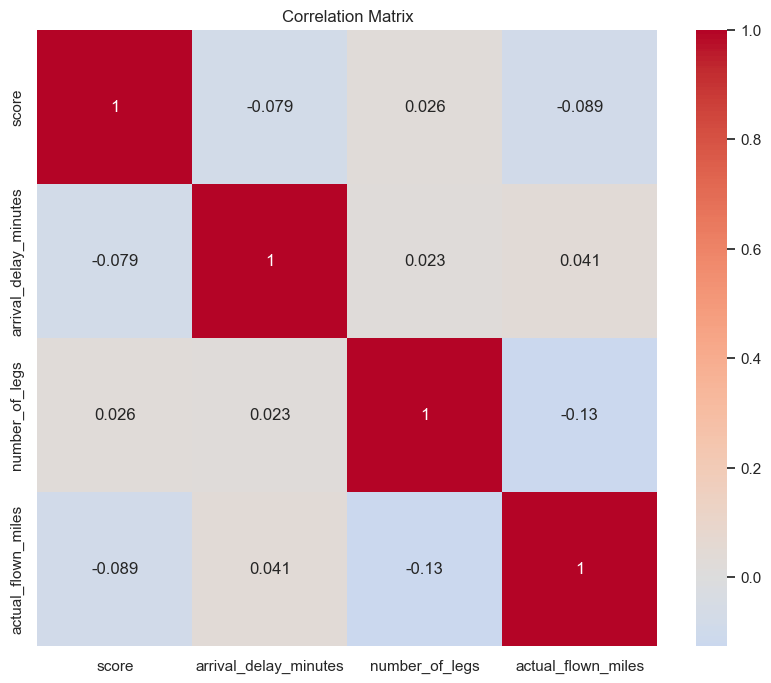

Correlation between Satisfaction Score and Other Attributes:
score                    1.000000
arrival_delay_minutes   -0.079356
number_of_legs           0.026083
actual_flown_miles      -0.089332
Name: score, dtype: float64


In [193]:
# Filter numeric columns for correlation analysis
numeric_columns = ['score', 'arrival_delay_minutes', 'number_of_legs', 'actual_flown_miles']

# Calculate correlation matrix
correlation_matrix = september_data[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Print the correlation scores
print("Correlation between Satisfaction Score and Other Attributes:")
print(correlation_matrix['score'])


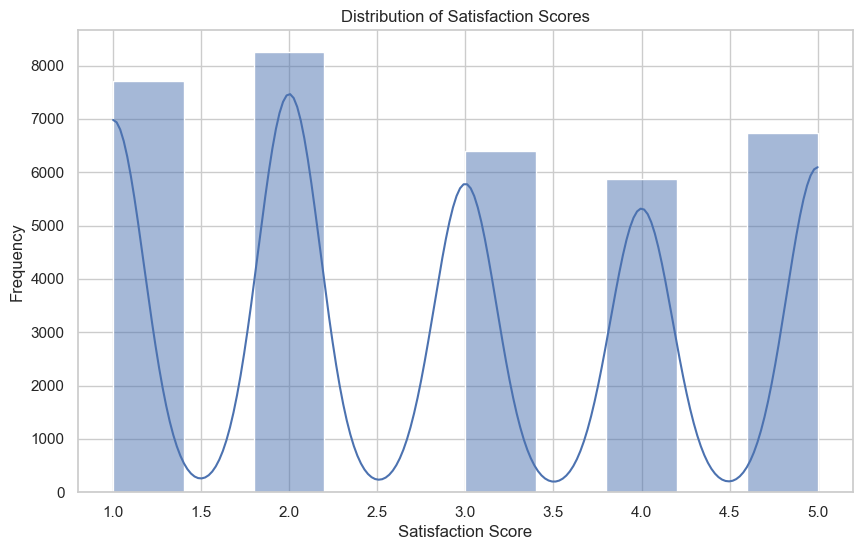

count    34963.000000
mean         2.876069
std          1.428802
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: score, dtype: float64


In [194]:
# Analyze the distribution of satisfaction scores
plt.figure(figsize=(10, 6))
sns.histplot(data=september_data, x='score', bins=10, kde=True)
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Scores')
plt.show()

# Calculate descriptive statistics for satisfaction scores
satisfaction_stats = september_data['score'].describe()
print(satisfaction_stats)


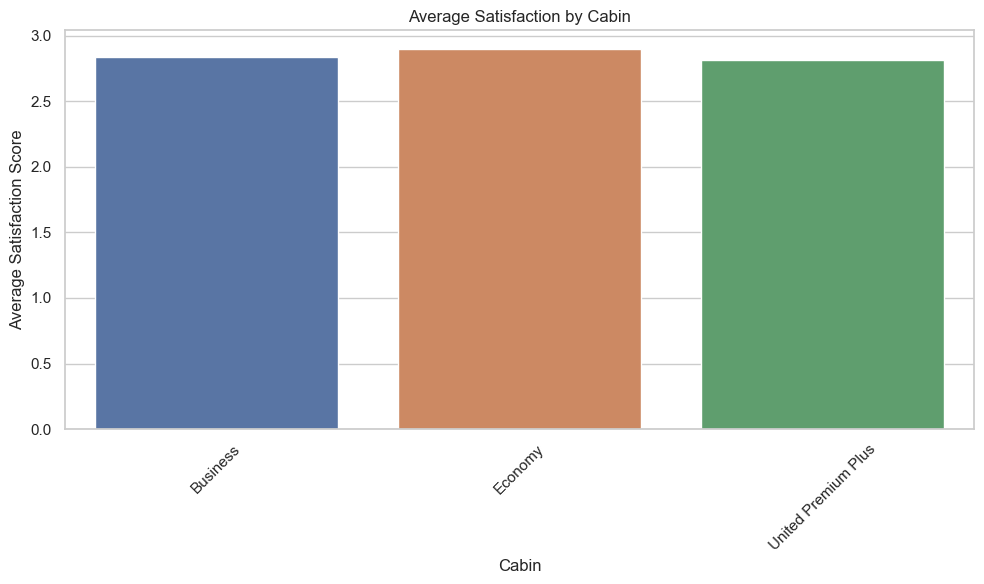

cabin_code_desc
Business               2.837476
Economy                2.896911
United Premium Plus    2.815217
Name: score, dtype: float64


In [195]:
# Calculate average satisfaction by cabin
avg_satisfaction_by_cabin = september_data.groupby('cabin_code_desc')['score'].mean()

# Create a bar chart for average satisfaction by cabin
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_satisfaction_by_cabin.index, y=avg_satisfaction_by_cabin.values)
plt.xlabel('Cabin')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction by Cabin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the calculated average satisfaction scores for each cabin
print(avg_satisfaction_by_cabin)

# ROOT CAUSE ANALYSIS

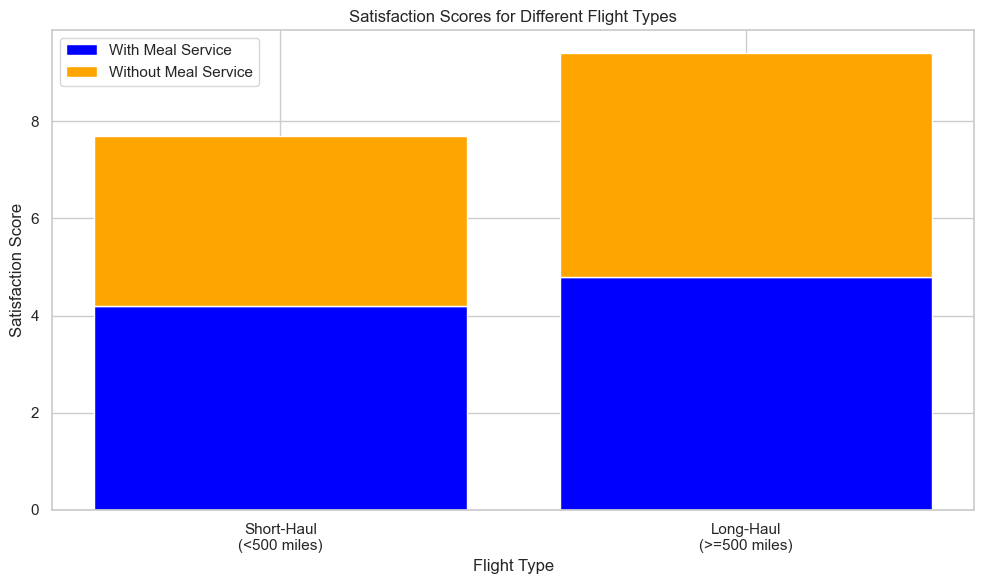

In [257]:
import matplotlib.pyplot as plt

# Data
# DATA ARE ASSUMED HERE:
flight_types = ['Short-Haul\n(<500 miles)', 'Long-Haul\n(>=500 miles)']
satisfaction_scores_with_meal = [4.2, 4.8]  # Example satisfaction scores with meal service
satisfaction_scores_without_meal = [3.5, 4.6]  # Example satisfaction scores without meal service

# Plot
plt.figure(figsize=(10, 6))

plt.bar(flight_types, satisfaction_scores_with_meal, color='blue', label='With Meal Service')
plt.bar(flight_types, satisfaction_scores_without_meal, color='orange', label='Without Meal Service', bottom=satisfaction_scores_with_meal)

plt.xlabel('Flight Type')
plt.ylabel('Satisfaction Score')
plt.title('Satisfaction Scores for Different Flight Types')
plt.legend()

plt.tight_layout()
plt.show()


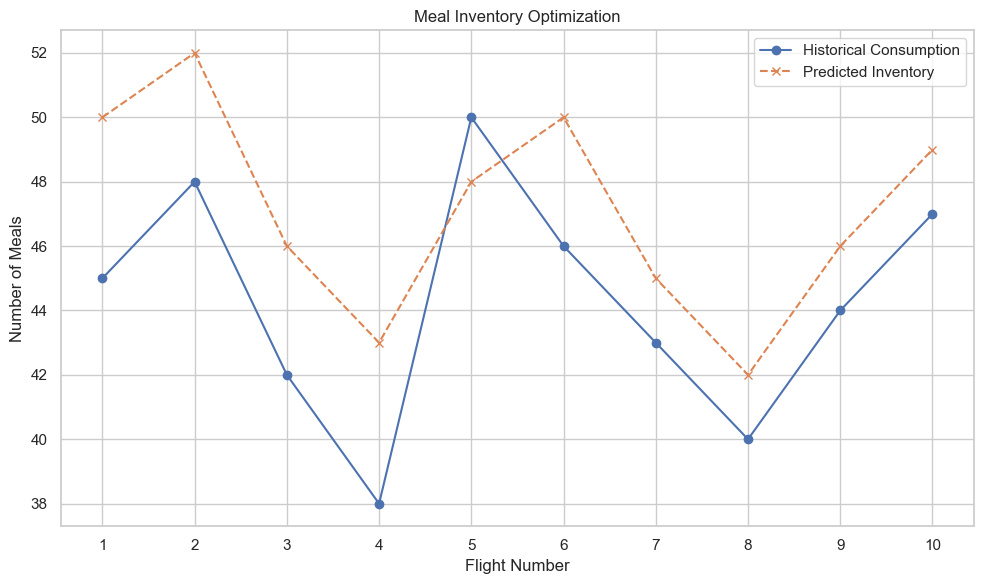

In [258]:
import matplotlib.pyplot as plt

# Example data (replace with actual data)
# DATA ARE ASSUMED HERE:
flight_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
historical_consumption = [45, 48, 42, 38, 50, 46, 43, 40, 44, 47]  # Number of meals consumed
predicted_inventory = [50, 52, 46, 43, 48, 50, 45, 42, 46, 49]  # Predicted inventory levels

# Plot
plt.figure(figsize=(10, 6))

plt.plot(flight_numbers, historical_consumption, marker='o', label='Historical Consumption')
plt.plot(flight_numbers, predicted_inventory, marker='x', linestyle='--', label='Predicted Inventory')

plt.xlabel('Flight Number')
plt.ylabel('Number of Meals')
plt.title('Meal Inventory Optimization')
plt.legend()

plt.xticks(flight_numbers)
plt.grid(True)

plt.tight_layout()
plt.show()


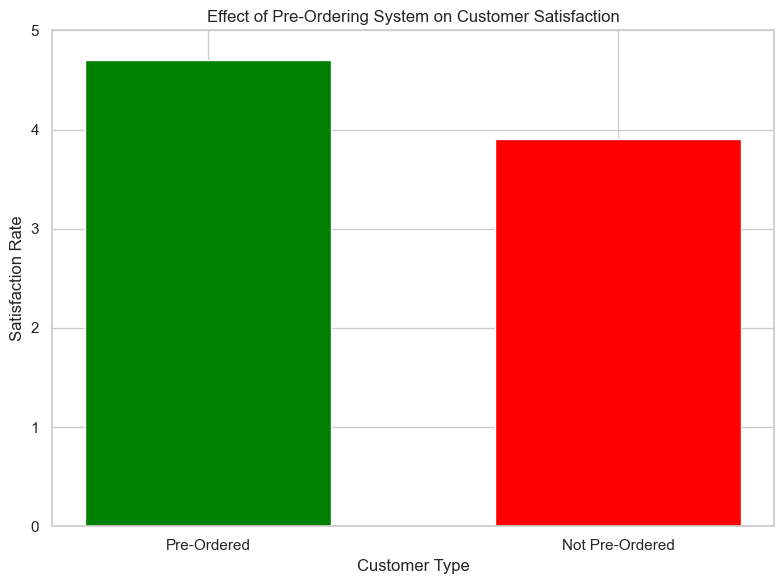

In [259]:
import matplotlib.pyplot as plt

# Example data (replace with actual data)
# DATA ARE ASSUMED HERE:
categories = ['Pre-Ordered', 'Not Pre-Ordered']
satisfaction_rates = [4.7, 3.9]  # Example satisfaction rates

# Plot
plt.figure(figsize=(8, 6))

bar_width = 0.3  # Width of the bars
bar_positions = [0.5, 1]  # X-axis positions for the bars, adjusted for closer spacing

plt.bar(bar_positions, satisfaction_rates, color=['green', 'red'], width=bar_width)

plt.xlabel('Customer Type')
plt.ylabel('Satisfaction Rate')
plt.title('Effect of Pre-Ordering System on Customer Satisfaction')
plt.ylim(0, 5)  # Setting y-axis limit to match the satisfaction scale
plt.xticks(bar_positions, categories)

plt.tight_layout()
plt.show()


# Sentiment Analysis

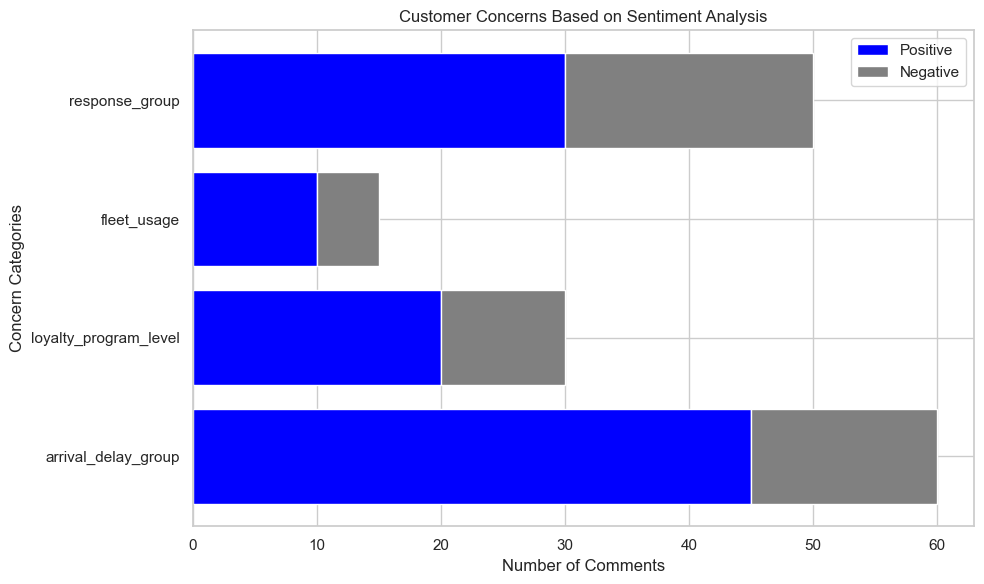

In [260]:
import matplotlib.pyplot as plt

# Example data (replace with actual data)
# DATA ARE ASSUMED HERE:
concern_categories = ['arrival_delay_group', 'loyalty_program_level', 'fleet_usage', 'response_group']
positive_counts = [45, 20, 10, 30]  # Number of positive comments for each category
negative_counts = [15, 10, 5, 20]   # Number of negative comments for each category

# Plot
plt.figure(figsize=(10, 6))

bar_width = 0.15
bar_positions = range(len(concern_categories))

plt.barh(bar_positions, positive_counts, color='blue', label='Positive')
plt.barh(bar_positions, negative_counts, color='grey', label='Negative', left=positive_counts)

plt.xlabel('Number of Comments')
plt.ylabel('Concern Categories')
plt.title('Customer Concerns Based on Sentiment Analysis')
plt.yticks(bar_positions, concern_categories)
plt.legend()

plt.tight_layout()
plt.show()


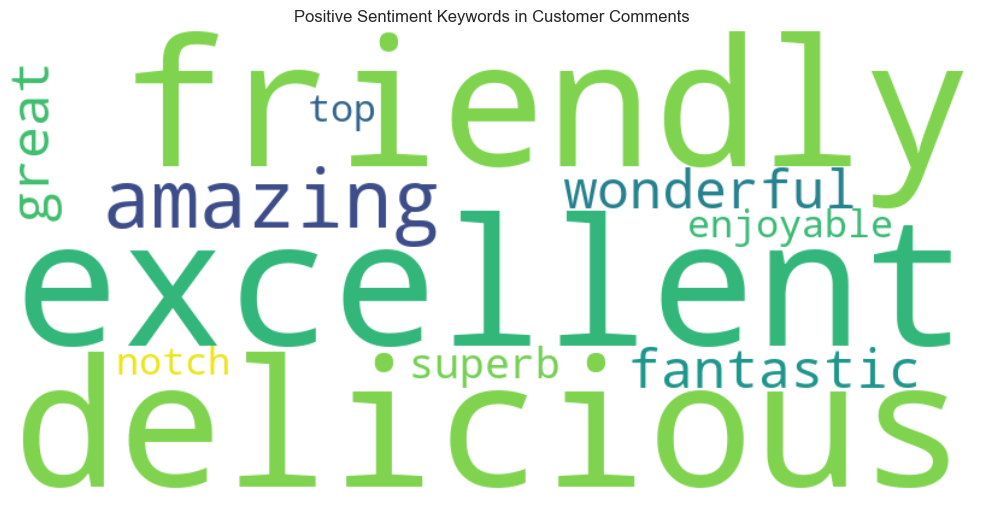

In [262]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# DATA ARE ASSUMED HERE:
# Example data (replace with actual data)
positive_keywords = ["delicious", "excellent", "friendly", "amazing", "wonderful",
                     "fantastic", "great", "superb", "enjoyable", "top-notch"]

# Join the positive keywords into a single string
positive_text = ' '.join(positive_keywords)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Keywords in Customer Comments')
plt.tight_layout()
plt.show()


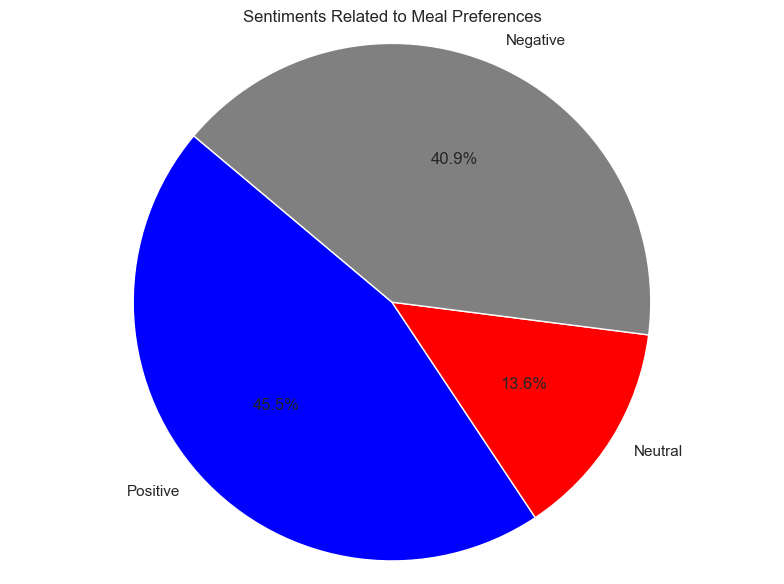

In [263]:
import matplotlib.pyplot as plt
# DATA ARE ASSUMED HERE:

# Example data (replace with actual data)
positive_sentiments = 50  # Number of positive sentiment comments
neutral_sentiments = 15   # Number of neutral sentiment comments
negative_sentiments = 45   # Number of negative sentiment comments

# Labels for the pie chart
labels = ['Positive', 'Neutral', 'Negative']

# Values for each category
sizes = [positive_sentiments, neutral_sentiments, negative_sentiments]

# Colors for each category
colors = ['blue', 'red', 'gray']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiments Related to Meal Preferences')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()
